**Trabalhando com datas**

In [1]:
#Importando a Biblioteca
import pandas as pd

In [2]:
#Leitura dos Arquivos
df01 = pd.read_excel("Aracaju.xlsx")
df02 = pd.read_excel("Fortaleza.xlsx")
df03 = pd.read_excel("Natal.xlsx")
df04 = pd.read_excel("Recife.xlsx")
df05 = pd.read_excel("Salvador.xlsx")

In [4]:
#unificação dos 5 arquivos
df = pd.concat([df01,df02,df03,df04,df05])

In [5]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
# Converte o tipo de dado da coluna "LojaID" para "object" (tipicamente usado para dados categóricos ou texto)
df["LojaID"] = df["LojaID"].astype("object")

In [7]:
df.dtypes

,0
Cidade,object
Data,datetime64[ns]
Vendas,float64
LojaID,object
Qtde,int64


In [8]:
# Cria uma nova coluna chamada "Receita"
# A coluna "Receita" é calculada multiplicando os valores da coluna "Vendas" pelos valores da coluna "Qtde".
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [9]:
# Converte a coluna "Data" para o tipo "int64"
df["Data"] = df["Data"].astype("int64")

In [10]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,1514764800000000000,142.00,1520,1,142.00
1,Aracaju,1514764800000000000,14.21,1522,6,85.26
2,Aracaju,1514764800000000000,71.55,1520,1,71.55
3,Aracaju,1514764800000000000,3.01,1521,7,21.07
4,Aracaju,1514764800000000000,24.51,1522,8,196.08


In [11]:
#verificando o tipo da coluna
df.dtypes

,0
Cidade,object
Data,int64
Vendas,float64
LojaID,object
Qtde,int64
Receita,float64


In [12]:
# Converte a coluna "Data" de tipo inteiro (ou string) para o tipo de dado datetime
# O método "pd.to_datetime()" converte a coluna para um formato de data e hora.
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

,0
Cidade,object
Data,datetime64[ns]
Vendas,float64
LojaID,object
Qtde,int64
Receita,float64


In [13]:
# Agrupa os dados por ano (extraído da coluna "Data") e calcula a soma da coluna "Receita" para cada ano
# O método "dt.year" extrai o ano da coluna "Data" e o "sum()" soma os valores da coluna "Receita" para cada ano.
df.groupby(df["Data"].dt.year)["Receita"].sum()

,Receita
Data,
2018,118176.53
2019,228246.45


In [14]:
# Cria uma nova coluna chamada "Ano_Venda" contendo apenas o ano extraído da coluna "Data"
# O método "dt.year" extrai o ano da data e o armazena na nova coluna "Ano_Venda".
df["Ano_Venda"] = df["Data"].dt.year

In [15]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
46,Recife,2019-01-01,239.17,981,8,1913.36,2019
138,Recife,2019-03-02,150.38,983,6,902.28,2019
87,Fortaleza,2019-01-01,42.04,1002,5,210.20,2019
170,Natal,2019-01-02,9.26,1035,3,27.78,2019
185,Salvador,2019-01-02,6.67,1036,1,6.67,2019


In [16]:
# Extrai o mês e o dia da coluna "Data" e cria duas novas colunas: "Mes_Venda" e "Dia_Venda"
# O método "dt.month" extrai o mês e "dt.day" extrai o dia da data, armazenando-os nas novas colunas.
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [17]:
# Retorna uma amostra aleatória de 5 linhas do DataFrame "df"
# O método "sample(5)" seleciona 5 registros aleatórios para visualização ou análise.
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
71,Salvador,2019-01-01,21.36,1035,2,42.72,2019,1,1
34,Aracaju,2018-01-01,38.25,1521,6,229.50,2018,1,1
126,Aracaju,2018-01-01,13.41,1520,7,93.87,2018,1,1
150,Salvador,2019-01-02,11.13,1035,2,22.26,2019,1,2
26,Salvador,2019-01-01,183.45,1036,3,550.35,2019,1,1


In [18]:
# Retorna a data mais antiga presente na coluna "Data"
# O método "min()" encontra o menor valor na coluna "Data", que neste caso é a data mais antiga.
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [19]:
# Calcula a diferença em dias entre cada data na coluna "Data" e a data mais antiga (mínima) do DataFrame
# O resultado é armazenado na nova coluna "Diferenca_Dias", representando o número de dias desde a data mais antiga.
df["Diferenca_Dias"] = df["Data"] - df["Data"].min()

In [20]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
213,Natal,2019-01-02,42.12,1035,1,42.12,2019,1,2,366 days
32,Salvador,2019-01-01,151.27,1035,1,151.27,2019,1,1,365 days
186,Salvador,2019-01-02,169.09,1036,2,338.18,2019,1,2,366 days
14,Recife,2019-01-12,102.91,982,3,308.73,2019,1,12,376 days
167,Natal,2019-01-02,36.42,1037,1,36.42,2019,1,2,366 days


In [21]:
# Cria uma nova coluna chamada "Trimestre_Vendas" contendo o trimestre de cada data na coluna "Data"
# O método "dt.quarter" extrai o trimestre (1 a 4) da data e armazena na nova coluna.
df["Trimestre_Vendas"] = df["Data"].dt.quarter

In [25]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Vendas
35,Aracaju,2018-01-01,40.60,1520,3,121.80,2018,1,1,0 days,1
137,Natal,2019-01-02,51.66,1036,3,154.98,2019,1,2,366 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
81,Fortaleza,2019-01-01,10.68,1005,1,10.68,2019,1,1,365 days,1
24,Aracaju,2018-01-01,151.04,1522,6,906.24,2018,1,1,0 days,1


In [26]:
# Filtra as vendas do DataFrame "df" para o ano de 2019 e o mês de março
# A condição verifica se o ano é 2019 e o mês é março (mês 3) na coluna "Data".
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [28]:
# Retorna uma amostra aleatória de 20 linhas do DataFrame "vendas_marco_19"
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Vendas
134,Fortaleza,2019-03-02,195.18,980,5,975.90,2019,3,2,425 days,1
2,Natal,2019-03-11,308.00,852,3,924.00,2019,3,11,434 days,1
19,Natal,2019-03-31,282.00,854,2,564.00,2019,3,31,454 days,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,2019,3,2,425 days,1
45,Natal,2019-03-11,431.00,852,3,1293.00,2019,3,11,434 days,1
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1
69,Natal,2019-03-24,817.00,852,4,3268.00,2019,3,24,447 days,1
136,Salvador,2019-03-02,13.81,1036,1,13.81,2019,3,2,425 days,1
116,Recife,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1


**Visualização de dados**

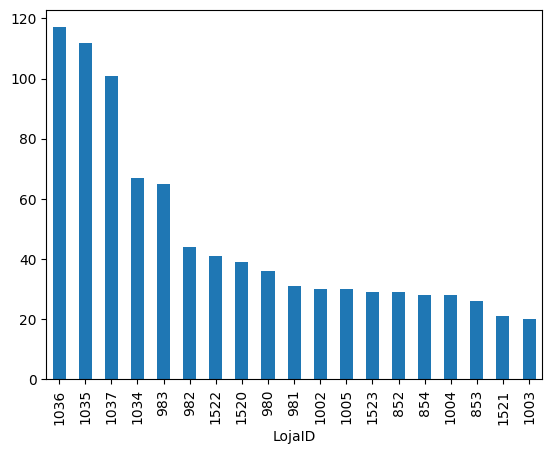

In [29]:
# Cria um gráfico de barras verticais para visualizar a contagem de valores únicos na coluna "LojaID"
# O método "value_counts()" conta as ocorrências de cada valor na coluna "LojaID", e "plot.bar()" gera o gráfico de barras verticais.
df['LojaID'].value_counts(ascending=False).plot.bar();

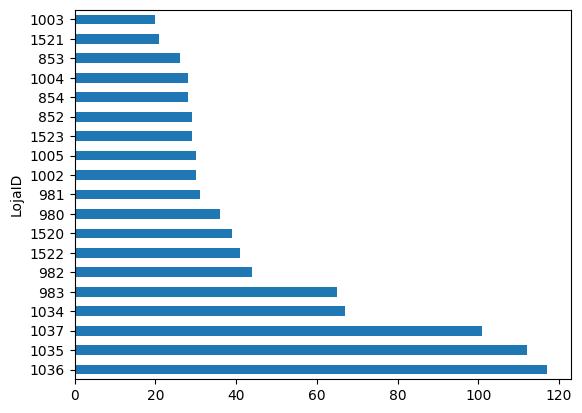

In [33]:
# Cria um gráfico de barras horizontais para visualizar a contagem de valores únicos na coluna "LojaID"
# O método "value_counts()" conta as ocorrências de cada valor na coluna "LojaID", e "plot.barh()" gera o gráfico de barras horizontais.
df['LojaID'].value_counts().plot.barh();

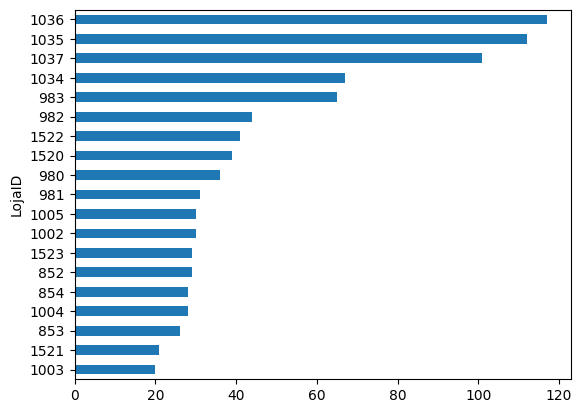

In [35]:
# Cria um gráfico de barras horizontais para visualizar a contagem de valores únicos na coluna "LojaID",
# ordenando do menor para o maior valor. O parâmetro "ascending=True" inverte a ordem das barras.
# O ponto e vírgula no final do código serve para ocultar a linha de saída do gráfico.
df['LojaID'].value_counts(ascending=True).plot.barh();

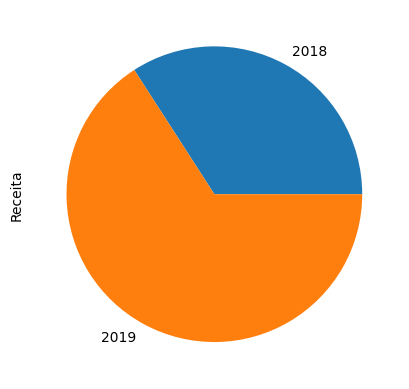

In [36]:
# Cria um gráfico de pizza para visualizar a soma da "Receita" por ano
# O método "groupby(df['Data'].dt.year)" agrupa os dados pelo ano da coluna "Data",
# e "sum()" calcula a soma da receita para cada ano. "plot.pie()" gera o gráfico de pizza.
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [37]:
# Conta a quantidade de ocorrências de cada valor na coluna "Cidade"
# O método "value_counts()" retorna a contagem de valores únicos presentes na coluna "Cidade".
df["Cidade"].value_counts()

,count
Cidade,
Natal,240
Salvador,240
Fortaleza,142
Recife,142
Aracaju,130
